# KMeans to test multiple dimensions at a time (gender)

## 0. Data Loading : dataset of NOUN + ADJ

In [1]:
import pandas as pd

# WE loading
all_n_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["number"])
all_a_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns = ["number"])
all_na_we = pd.concat([all_n_we, all_a_we])

# Normalization: values fall within -1 and 1
for i in range(512):

    values, copy = list(all_na_we[str(i)]), list(all_na_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_na_we[str(i)] = [val / (max_ - min_) for val in values]

all_na_we["gender"] = all_na_we["gender"].apply(lambda x: 1 if x == "masculine" else 0)

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## Testing 1 Dimension at a time  
execution time ~21sec.

In [3]:
dim_list_1= [str(i) for i in range(512)] # all dimensions
df_clustering_1 = pd.DataFrame(columns = ["ARI"])
ari = []

for dim in dim_list_1:

    # Clustering using Kmeans
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim].values.reshape(-1, 1))

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["gender"], km.labels_))

df_clustering_1["ARI"] = ari
df_clustering_1.index = dim_list_1

In [4]:
top10_1 = df_clustering_1.sort_values(by = "ARI", ascending = False)
dim_top10_1 = list(top10_1.head(10).index)
top10_1.head(10)

,ARI
245,0.027971
192,0.025293
121,0.023947
507,0.023088
5,0.020263
250,0.019493
470,0.019037
439,0.018981
276,0.018728
133,0.018617


## Testing 2 dimensions at a time  
Execution time ~ 142min

In [ ]:
dim_list_2 = [[str(i), str(j)] for i in range(512) for j in range(512) if i < j] # all pairs of dimensions
print("Total number of combinations: ", len(dim_list_2))

df_clustering_2 = pd.DataFrame(columns = ["ARI"])
ari = []


for i, dim in enumerate(dim_list_2):

    # Clustering using Kmeans
    km = KMeans(n_clusters=2, random_state=42, n_init=10)
    km.fit(all_na_we[dim])

    # Compute the Adjusted Rand Index: the closer to 1, the better
    ari.append(adjusted_rand_score(all_na_we["gender"], km.labels_))

    if i % (len(dim_list_2)//10) == 0:
        print("Progress: ", i/len(dim_list_2)*100, "%")

df_clustering_2["ARI"] = ari

In [24]:
df_clustering_2.index = [str(dim_tuple) for dim_tuple in dim_list_2]
top10_2 = df_clustering_2.sort_values(by = "ARI", ascending = False)
dim_top10_2 = list(top10_2.head(10).index)
top10_2.head(10)

,ARI
"['121', '245']",0.048033
"['121', '250']",0.044841
"['245', '316']",0.042659
"['192', '195']",0.041447
"['5', '245']",0.041173
"['195', '245']",0.040728
"['245', '507']",0.040284
"['192', '439']",0.040185
"['245', '439']",0.040132
"['245', '377']",0.040015


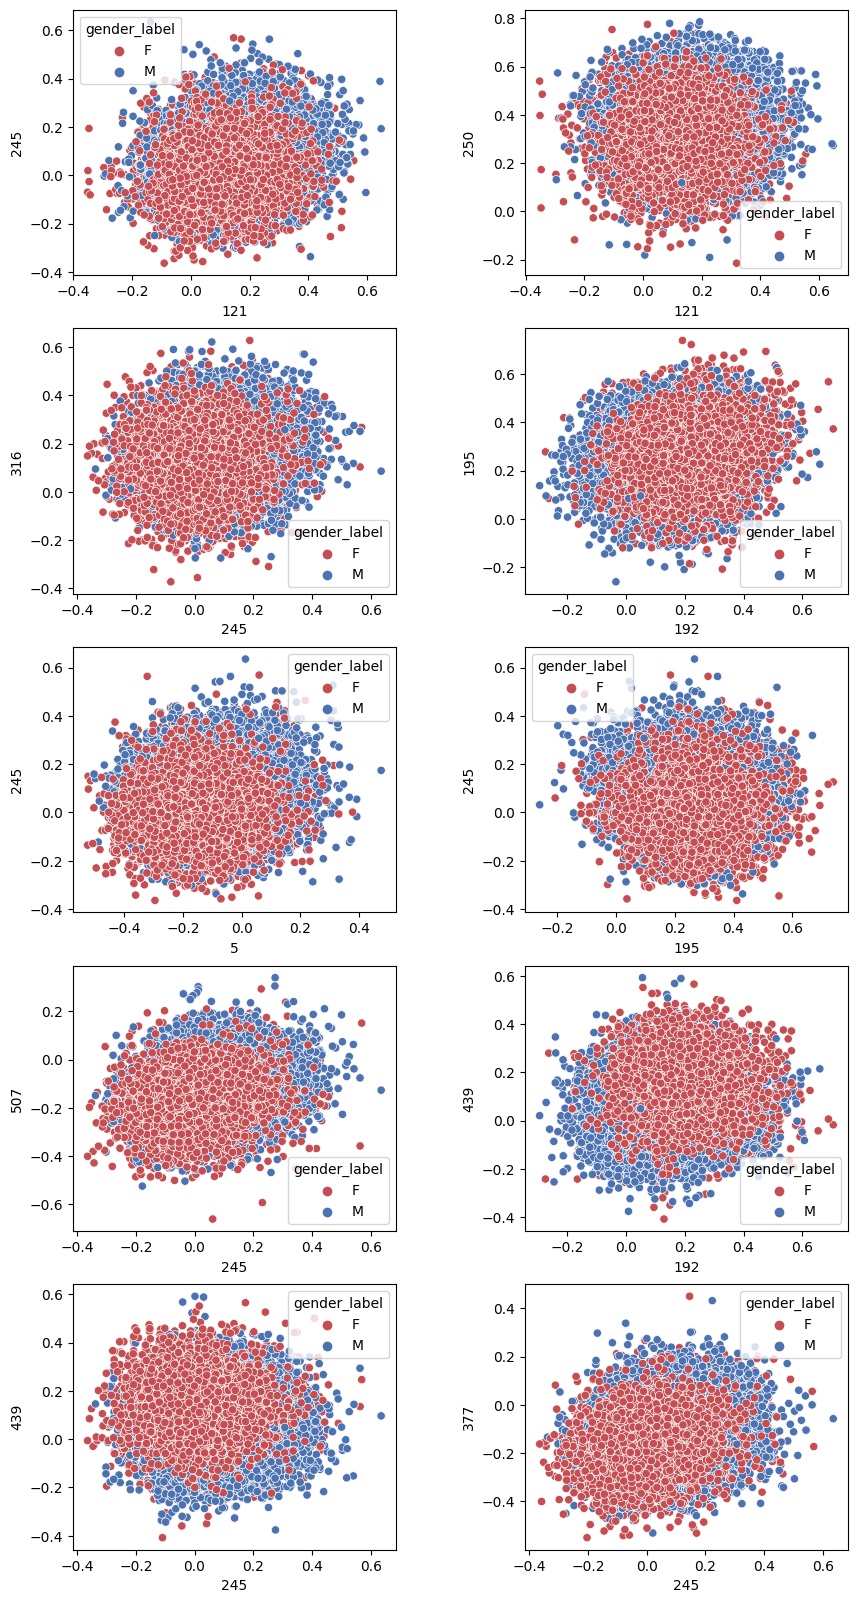

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

# create a figure with 10 subplots
fig, axes = plt.subplots(5, 2, figsize=((10,20)))
fig.subplots_adjust( wspace=0.4)

all_na_we["gender_label"] = all_na_we["gender"].apply(lambda x:"F" if x == 0 else "M")

sns.scatterplot(data = all_na_we, x = "121", y = "245", hue = "gender_label", ax = axes[0, 0], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "121", y = "250", hue = "gender_label", ax = axes[0, 1], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "245", y = "316", hue = "gender_label", ax = axes[1, 0], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "192", y = "195", hue = "gender_label", ax = axes[1, 1], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "5", y = "245", hue = "gender_label", ax = axes[2, 0], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "195", y = "245", hue = "gender_label", ax = axes[2, 1], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "245", y = "507", hue = "gender_label", ax = axes[3, 0], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "192", y = "439", hue = "gender_label", ax = axes[3, 1], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "245", y = "439", hue = "gender_label", ax = axes[4, 0], palette = sns.color_palette(["#C44E52", "#4C72B0"]))
sns.scatterplot(data = all_na_we, x = "245", y = "377", hue = "gender_label", ax = axes[4, 1], palette = sns.color_palette(["#C44E52", "#4C72B0"]))

plt.savefig("10_scatterplots.png")
plt.show()

In [9]:
print(dim_top10_2, dim_top10_1)

["['121', '245']", "['121', '250']", "['245', '316']", "['192', '195']", "['5', '245']", "['195', '245']", "['245', '507']", "['192', '439']", "['245', '439']", "['245', '377']"] ['245', '192', '121', '507', '5', '250', '470', '439', '276', '133']


In [19]:
dim_list = ["121", "245", "250", "316", "192", "195", "5", "507", "439", "377", "276", "133"]

km = KMeans(n_clusters=2, random_state=42, n_init=10)
km.fit(all_na_we[dim_list])
print(adjusted_rand_score(all_na_we["gender"], km.labels_))

0.03191608135554191
